<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/Eng_to_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import gensim
import spacy

plotly is used to generate interactive plots. It is used for interactive data visualisation.

In [ ]:
from collections import Counter
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import STOPWORDS, WordCloud
import re
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
#import gensim.utils.simple_preprocess
#from genism.utils import simple_preprocess
#from genism.parsing.preprocessing import STOPWORDS
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, LSTM
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', Context='notebook',ticks=True, grids=False)

In [ ]:
df_english = pd.read_csv('small_vocab_en.csv', sep='\t', names=['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep='\t', names=['french'])

In [ ]:
df_english.shape

(137860, 1)

In [ ]:
df_french.shape

(137860, 1)

In [ ]:
print(df_english.isna().sum())
df_french.isna().sum()

english    0
dtype: int64


french    0
dtype: int64

In [ ]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df_english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [ ]:
df_french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [ ]:
new_df = pd.concat([df_english , df_french],axis=1)
new_df.head(10)
#new_df.shape

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
5,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."
6,"paris is relaxing during december , but it is ...","paris est relaxant en décembre , mais il est g..."
7,"new jersey is busy during spring , and it is n...","new jersey est occupé au printemps , et il est..."
8,"our least liked fruit is the lemon , but my le...","notre fruit est moins aimé le citron , mais mo..."
9,the united states is sometimes busy during jan...,"les états-unis est parfois occupé en janvier ,..."


In [ ]:
print('Total English record=', len(new_df['english']))
print('Total French record=', len(new_df['french']))

Total English record= 137860
Total French record= 137860


In [ ]:
def remove_punc(text):
  return re.sub('[!,.;:?/"#@^]','',text)

#1st method to call the function remove_punc()
new_df['english']= new_df['english'].apply(remove_punc)
new_df['french']= new_df['french'].apply(remove_punc)
new_df['english']

0         new jersey is sometimes quiet during autumn  a...
1         the united states is usually chilly during jul...
2         california is usually quiet during march  and ...
3         the united states is sometimes mild during jun...
4         your least liked fruit is the grape  but my le...
                                ...                        
137855    france is never busy during march  and it is s...
137856    india is sometimes beautiful during spring  an...
137857    india is never wet during summer  but it is so...
137858    france is never chilly during january  but it ...
137859    the orange is her favorite fruit  but the bana...
Name: english, Length: 137860, dtype: object

In [ ]:
# 2nd method to call the function remove_punc()
# for doc in new_df['english']:
#   doc = remove_punc(doc)                              ## WRONG
# new_df['english']

In [ ]:
#Another method to remove punctuation
# import string
# for doc in new_df['english']:                                
#   line = doc
#   table = line.maketrans('','',string.punctuation)
#   doc = line.translate(table)

# new_df['english']



In [ ]:
eng_word_list = []
french_word_list = []

# def get_unique_words(text, word_list):
#   for word in text.split():
#     if word not in word_list:
#       word_list.append(word)
#   return word_list

# new_df['english'].apply(lambda text:get_unique_words(text,eng_word_list))
# new_df['french'].apply(lambda text:get_unique_words(text,french_word_list))

In [ ]:
# total_eng_words = len(eng_word_list)
# total_french_words = len(french_word_list)

In [ ]:
def unique_words_list(lines, word_list):
  for line in lines:
    for word in line.split():
      if word not in word_list:
        word_list.append(word)
  return word_list
  
eng_words =  unique_words_list(new_df['english'], eng_word_list)
fr_words = unique_words_list(new_df['french'], french_word_list)
total_eng_words = len(eng_words)
total_fr_words = len(fr_words)

print(total_eng_words)
print(total_fr_words)


199
350


In [ ]:
#  Another method to count unique words using set

# eng_1 = set()
# fr_1 = set()

# def unique_words(series,set1):
#   #vocab = set()
#   for lines in series:
#     for words in lines.split():
#       print(words)
#       set1.update(words)
#   return set1

# unique_eng = unique_words(new_df['english'],eng_1) 
# print(len(unique_eng))
# unique_french = unique_words(new_df['french'],fr_1)
# print(len(unique_french))

In [ ]:
def get_all_words(lines,word_list):
  for line in lines:
    for word in line.split():
      word_list.append(word)
  return word_list

eng_new_list = []
french_new_list = []

eng_words =  get_all_words(new_df['english'], eng_new_list)
fr_words = get_all_words(new_df['french'], french_new_list)
eng_words


['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 'new',
 'jersey',
 'is',
 'busy',
 'during',
 'spring',
 'and',
 'it',
 'is',
 'never',
 'hot',
 'in',
 'march',
 'our',
 'leas

In [ ]:
# Another method to count all the words

# words = []
# for line in new_df['english']:
#     for word in line.split():
#       words.append(word)
# words

In [ ]:
all_eng_words = Counter(eng_words)                 # Counter is used to get all words and their counts. Counter returns a dictionary
all_french_words = Counter(fr_words)            # Counter takes list of all the words


In [ ]:
all_eng_words

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

In [ ]:
eng_words_sorted = sorted(all_eng_words.items(), key=operator.itemgetter(1), reverse=True)
french_words_sorted = sorted(all_french_words.items(), key=operator.itemgetter(1), reverse=True)



In [ ]:
eng_words_sorted

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [ ]:
eng_word = []
eng_count = []
for key,value in all_eng_words.items():
  eng_word.append(key)
  eng_count.append(value)
print(eng_word)
print(eng_count)


['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', 'and', 'it', 'snowy', 'in', 'april', 'the', 'united', 'states', 'usually', 'chilly', 'july', 'freezing', 'november', 'california', 'march', 'hot', 'june', 'mild', 'cold', 'september', 'your', 'least', 'liked', 'fruit', 'grape', 'but', 'my', 'apple', 'his', 'favorite', 'orange', 'paris', 'relaxing', 'december', 'busy', 'spring', 'never', 'our', 'lemon', 'january', 'warm', 'lime', 'her', 'banana', 'he', 'saw', 'a', 'old', 'yellow', 'truck', 'india', 'rainy', 'that', 'cat', 'was', 'most', 'loved', 'animal', 'dislikes', 'grapefruit', 'limes', 'lemons', 'february', 'china', 'pleasant', 'october', 'wonderful', 'nice', 'summer', 'france', 'may', 'grapes', 'mangoes', 'their', 'mango', 'pear', 'august', 'beautiful', 'apples', 'peaches', 'feared', 'shark', 'wet', 'dry', 'we', 'like', 'oranges', 'they', 'pears', 'she', 'little', 'red', 'winter', 'disliked', 'rusty', 'car', 'strawberries', 'i', 'strawberry', 'bananas', 'going', 'to'

In [ ]:
fig = px.bar(x = eng_word, y = eng_count)               # plotly.express can create entire figure at once. It is recommended starting point 
fig.show()                                              # for creating most common figures.

In [ ]:
french_word = []
french_count = []
for key,value in all_french_words.items():
  french_word.append(key)
  french_count.append(value)



In [ ]:
fig = px.bar(x=french_word, y=french_count)
fig.show()

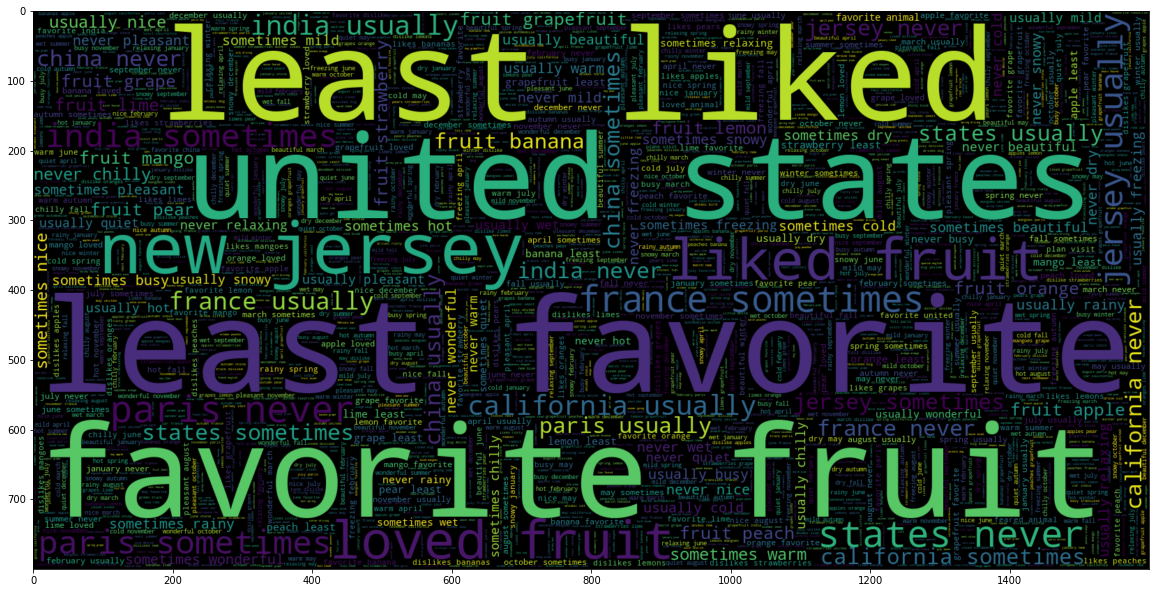

In [ ]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(new_df['english']))
plt.imshow(wc, interpolation='bilinear')

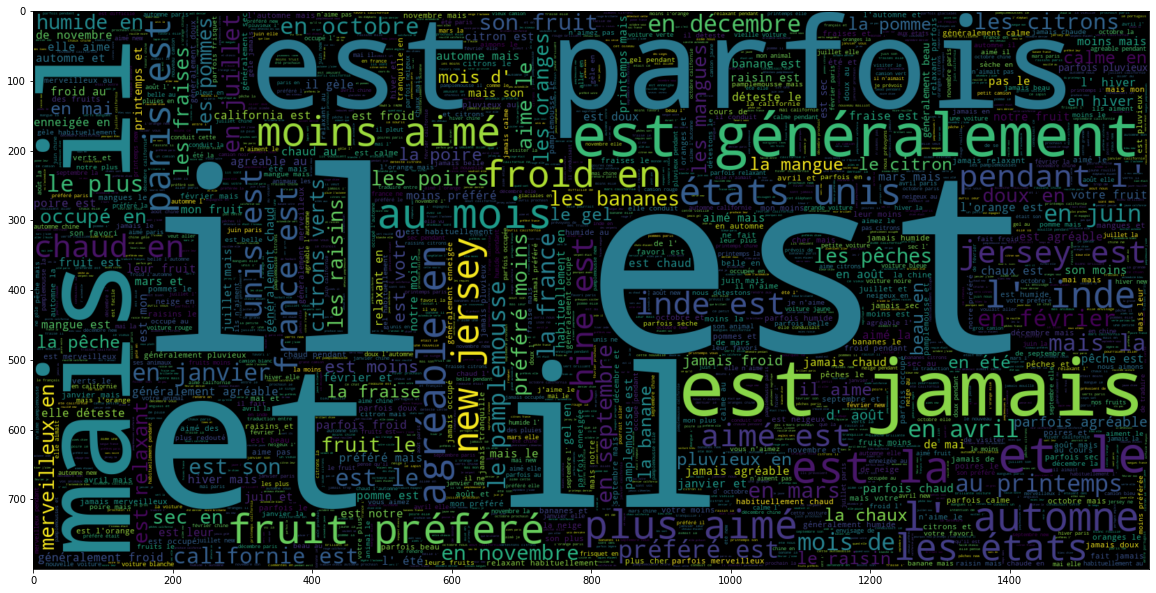

In [ ]:
plt.figure(figsize=(20,20))               # here, the size of theword represents the frequency as well as the importans of the word
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(new_df['french']))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
def max_length(text):
  maximum = []
  for lines in text:
    num = lines.split()
    maximum.append(len(num))
  max_len = max(maximum) 
  return max_len

eng_max = max_length(new_df['english'])
french_max = max_length(new_df['french'])

print(eng_max)
print(french_max)


15
21


In [ ]:
max_length = -1
for line in new_df['french']:
  words = line.split()
  

In [ ]:
# Another method to find maximum length using nltk.word_tokenize()
# from nltk import word_tokenize
# maxi = -1
# for lines in new_df.french:
#   #n = nltk.tokenize()
#   t = nltk.word_tokenize(lines)
#   if maxi < len(t):
#     maxi = len(t)

# print(maxi)


LookupError: ignored

In [ ]:
def tokenize_and_pad(text,max_len):
  t = Tokenizer()
  t.fit_on_texts(text)
  sequence =t.texts_to_sequences(text)
  pad_seq = pad_sequences(sequence,maxlen=max_len,padding='post')
  return t, sequence, pad_seq

In [ ]:
x_tokenizer,x_sequence, x_padded = tokenize_and_pad(new_df['english'],eng_max)  # bcoz we want both input and output o be of same length
y_tokenizer,y_sequence, y_padded = tokenize_and_pad(new_df['french'],french_max)

In [ ]:
print('The tokenizer for documents:\n', new_df['english'][-1:], 'is: \n', x_padded[-1:])

The tokenizer for documents:
 137859    the orange is her favorite fruit  but the bana...
Name: english, dtype: object is: 
 [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [ ]:
print('The tokenizer for documents:\n', new_df['french'][-1:], 'is: \n', x_padded[-1:])

The tokenizer for documents:
 137859    l'orange est son fruit préféré  mais la banane...
Name: french, dtype: object is: 
 [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size =0.1)

In [ ]:
eng_vocab = total_eng_words + 1    # vocab_size = (no. of words + 1) bcoz 0 is resevered for padding which is not used during converting words to number sequences
fr_vocab = total_fr_words + 1
model = Sequential()
model.add(Embedding(eng_vocab, 256, input_length=eng_max, mask_zero=True))
# LSTM(encoder)
model.add(LSTM(256))
model.add(RepeatVector(french_max))
# LSTM(decoder)
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab, activation='softmax')))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 15, 256)           51200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 21, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 21, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 21, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


RepeatVector Converts the output of LSTM(encoder) to 3D array.
It repeats the input to desired no of times to simply convert 2D array to 3D array.

In [ ]:
y_train = np.expand_dims(y_train, axis=2)
y_train.shape

(124074, 21, 1)

In [ ]:
model.fit(x_train, y_train, batch_size=1024, validation_split=0.1, epochs=5)

Epoch 1/5
110/110 [==============================] - 318s 3s/step - loss: 2.8877 - accuracy: 0.4513 - val_loss: 2.2732 - val_accuracy: 0.4961
Epoch 2/5
110/110 [==============================] - 318s 3s/step - loss: 1.9801 - accuracy: 0.5413 - val_loss: 1.7522 - val_accuracy: 0.5687
Epoch 3/5
110/110 [==============================] - 319s 3s/step - loss: 1.6271 - accuracy: 0.5838 - val_loss: 1.4934 - val_accuracy: 0.6049
Epoch 4/5
110/110 [==============================] - 318s 3s/step - loss: 1.3954 - accuracy: 0.6222 - val_loss: 1.3187 - val_accuracy: 0.6286
Epoch 5/5
110/110 [==============================] - 316s 3s/step - loss: 1.2167 - accuracy: 0.6572 - val_loss: 1.1214 - val_accuracy: 0.6834


In [ ]:
model.save('weights.h5')

In [ ]:
x_test.shape

(13786, 15)

In [ ]:
x_test

array([[ 50,  12,  11, ...,   5,  89,   0],
       [ 22,   1,  10, ...,   0,   0,   0],
       [ 27,   1, 126, ...,   0,   0,   0],
       ...,
       [  5,  20,  21, ...,  40,   0,   0],
       [ 29,  12,  11, ...,   5,  91,   0],
       [ 22,   1,   8, ...,  43,   0,   0]], dtype=int32)

In [ ]:
x_test[0]

array([50, 12, 11, 13,  1,  5, 83,  6, 30, 12, 11,  1,  5, 89,  0],
      dtype=int32)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict

array([[[1.93896176e-05, 3.95168690e-03, 3.55380394e-06, ...,
         3.58991497e-06, 4.37960716e-06, 3.88047965e-06],
        [1.67412134e-06, 3.38963903e-02, 5.26437134e-07, ...,
         2.09780211e-07, 1.49993511e-07, 1.11091843e-07],
        [1.81647954e-06, 2.50312179e-01, 1.19711990e-06, ...,
         3.96695050e-08, 3.82720842e-08, 2.38522269e-08],
        ...,
        [9.97735620e-01, 1.55066646e-05, 8.73028330e-05, ...,
         1.29556518e-10, 1.87380181e-10, 2.46644122e-10],
        [9.97944057e-01, 1.40239008e-05, 8.19517372e-05, ...,
         1.15170089e-10, 1.72888787e-10, 2.22886265e-10],
        [9.98076916e-01, 1.32149635e-05, 7.73348584e-05, ...,
         1.07930477e-10, 1.63711170e-10, 2.11011111e-10]],

       [[2.44929743e-06, 8.80415738e-03, 2.52112727e-06, ...,
         3.26364670e-07, 5.75066395e-07, 5.50146410e-07],
        [2.57183586e-07, 8.64970386e-01, 6.91414516e-06, ...,
         4.61785987e-08, 5.42427863e-08, 2.92834521e-08],
        [4.14538135e-07, 

In [ ]:
def prediction(x, x_tokens,y_tokens):
  predictions = model.predict(x_test)[0]
  word_and_id = y_tokens.word_index
  for word, index in word_and_id.items():
    word_id_dict = {id:word}
  word_id_dict[0] = ''
  for j in np.argmax(predictions,1):
    fr_text = ' '.join(word_id_dict[j])
  return fr_text



In [ ]:
def pad_to_text(padded, tokenizer):
  for word, index in word_and_id.items():
    word_id_dict = {id:word}
  word_id_dict[0] = ''
  for j in padded:
    fr_text = ' '.join(word_id_dict[j])
  return fr_text


In [ ]:
for i in range(5):
  print('Original English Words- {}\n'.format(pad_to_text(x_test[i],x_tokenizet)))
  print('Original French words- {}\n'.format(pad_to_text(y_test-i), y_tokenizer))
  print('Predicted French Words- {}\n')